In [67]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [68]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [69]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [70]:
len(train_images)
len(test_images)
len(train_labels)
len(test_labels)
print(test_labels)

[7 2 1 ... 4 5 6]


In [71]:
train_images[0].shape

(28, 28)

In [72]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

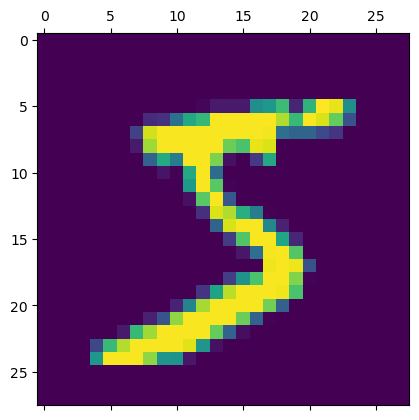

In [73]:
plt.matshow(train_images[0])

In [74]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test labels shape: {test_labels.shape}")

train_images=train_images.reshape(train_images.shape[0],28*28)
test_images = test_images.reshape(test_images.shape[0], 28*28)
print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Training labels shape: (60000,)
Test labels shape: (10000,)
Training data shape: (60000, 784)
Test data shape: (10000, 784)


In [87]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(train_images,train_labels,epochs=5);

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 660us/step - accuracy: 0.8148 - loss: 0.7144
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.9154 - loss: 0.3049
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.9215 - loss: 0.2788
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.9228 - loss: 0.2748
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.9250 - loss: 0.2706


In [88]:

model.evaluate(test_images, test_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.9121 - loss: 0.3073


[0.272311270236969, 0.9225999712944031]

In [89]:
y_predicted = model.predict(test_images)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


array([3.1134672e-02, 2.6583356e-07, 5.1647622e-02, 9.6891326e-01,
       3.6190988e-03, 1.7038970e-01, 1.3647349e-06, 9.9986041e-01,
       1.0466753e-01, 6.5567660e-01], dtype=float32)

In [90]:
np.argmax(y_predicted[0])
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [91]:
cm = tf.math.confusion_matrix(labels=test_labels,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    1,    0,    8,    5,    3,    2,    0],
       [   0, 1112,    2,    2,    0,    1,    4,    2,   12,    0],
       [   7,   10,  898,   30,    8,    5,   12,   10,   47,    5],
       [   1,    0,   11,  936,    0,   20,    2,    9,   24,    7],
       [   1,    1,    2,    2,  914,    0,   12,    4,   10,   36],
       [   8,    2,    1,   39,    8,  779,   11,    7,   31,    6],
       [  13,    3,    3,    2,    7,   20,  906,    2,    2,    0],
       [   1,    5,   19,   11,    8,    1,    0,  948,    3,   32],
       [   5,    7,    6,   27,    9,   27,    8,   13,  866,    6],
       [  11,    7,    1,   11,   29,    9,    0,   28,    7,  906]],
      dtype=int32)>

In [105]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images,train_labels , epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8725 - loss: 0.4579
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9608 - loss: 0.1323
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9734 - loss: 0.0888
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9824 - loss: 0.0618
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9851 - loss: 0.0485


In [106]:
model.evaluate(test_images, test_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.9710 - loss: 0.0925


[0.08246275782585144, 0.9751999974250793]

In [107]:
y_predicted = model.predict(test_images)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step


array([7.9237409e-03, 3.5511720e-04, 6.4503253e-01, 8.0803329e-01,
       1.4595769e-06, 2.8534462e-03, 2.3852610e-07, 9.9997783e-01,
       3.2317910e-02, 3.6275797e-02], dtype=float32)

In [108]:
cm = tf.math.confusion_matrix(labels=test_labels,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    1,    0,    0,    2,    1,    4,    1,    1,    2],
       [   0, 1126,    2,    1,    0,    2,    3,    0,    1,    0],
       [   4,    2, 1006,    1,    1,    0,    2,    6,    8,    2],
       [   1,    0,    5,  979,    0,   13,    0,    4,    4,    4],
       [   2,    0,    5,    0,  948,    0,    3,    5,    1,   18],
       [   2,    0,    0,    9,    2,  865,    5,    1,    2,    6],
       [   4,    2,    2,    0,    4,   12,  933,    0,    1,    0],
       [   0,    7,    9,    3,    0,    0,    0,  996,    4,    9],
       [   6,    0,    3,    5,    7,    5,    7,    3,  932,    6],
       [   1,    2,    0,    8,    6,    3,    0,    4,    1,  984]],
      dtype=int32)>

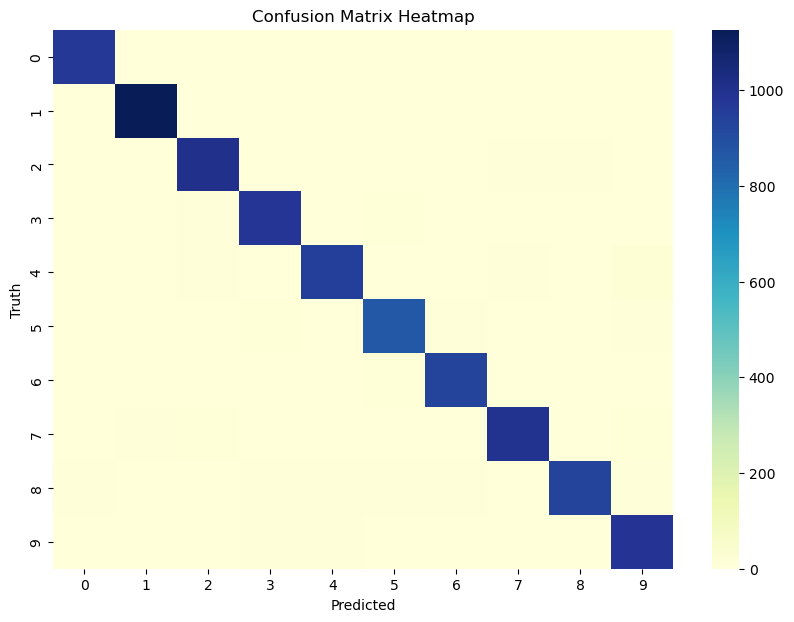

In [109]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, fmt='d', cmap='YlGnBu')

# Adjust labels and title
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix Heatmap')

plt.show()

In [131]:
from tensorflow import keras

# Define the model with an additional hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(50, activation='relu'),  # Additional hidden layer
    keras.layers.Dense(10, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8694 - loss: 0.4496
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9652 - loss: 0.1143
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9747 - loss: 0.0792
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9820 - loss: 0.0569
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9851 - loss: 0.0470


In [132]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9724 - loss: 0.0876


[0.07572810351848602, 0.9763000011444092]

In [133]:
cm = tf.math.confusion_matrix(labels=test_labels,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    1,    0,    0,    2,    1,    4,    1,    1,    2],
       [   0, 1126,    2,    1,    0,    2,    3,    0,    1,    0],
       [   4,    2, 1006,    1,    1,    0,    2,    6,    8,    2],
       [   1,    0,    5,  979,    0,   13,    0,    4,    4,    4],
       [   2,    0,    5,    0,  948,    0,    3,    5,    1,   18],
       [   2,    0,    0,    9,    2,  865,    5,    1,    2,    6],
       [   4,    2,    2,    0,    4,   12,  933,    0,    1,    0],
       [   0,    7,    9,    3,    0,    0,    0,  996,    4,    9],
       [   6,    0,    3,    5,    7,    5,    7,    3,  932,    6],
       [   1,    2,    0,    8,    6,    3,    0,    4,    1,  984]],
      dtype=int32)>

In [134]:
from tensorflow import keras

# Define the enhanced model architecture
model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(784,), activation='relu'),  # Layer 1: 256 neurons
    keras.layers.Dropout(0.2),  # Dropout layer to reduce overfitting
    keras.layers.Dense(128, activation='relu'),  # Layer 2: 128 neurons
    keras.layers.Dropout(0.2),  # Dropout layer to reduce overfitting
    keras.layers.Dense(64, activation='relu'),   # Layer 3: 64 neurons
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary to review the architecture and parameters
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_59 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8537 - loss: 0.4686 - val_accuracy: 0.9631 - val_loss: 0.1195
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9579 - loss: 0.1387 - val_accuracy: 0.9676 - val_loss: 0.1043
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9681 - loss: 0.1047 - val_accuracy: 0.9727 - val_loss: 0.0909
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9733 - loss: 0.0860 - val_accuracy: 0.9763 - val_loss: 0.0812
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9780 - loss: 0.0714 - val_accuracy: 0.9748 - val_loss: 0.0845
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9794 - loss: 0.0639 - val_accuracy: 0.9767 - val_loss: 0.0807
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9822 - loss: 0.0587 - val_accuracy: 0.9800 - val_loss: 0.0696
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9840 - loss: 0.0539 - 

In [135]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9759 - loss: 0.0958


[0.07883525639772415, 0.9801999926567078]